# Starbucks Nutrition
For Non-Technical Audience

## Take a look at the data: explore it.

In [1]:
# Import our libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import numpy as np
from pandas_profiling import ProfileReport

In [2]:
#pip install seaborn==0.11.0

In [3]:
# read in our data
drinks_expanded = pd.read_csv("starbucks_drinkMenu_expanded.csv")
drinks = pd.read_csv('starbucks-menu-nutrition-drinks.csv')

#food .csv file not working
#foods= pd.read_csv('starbucks-menu-nutrition-food.csv')

In [4]:
#drinks seems like the very basic database
drinks

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
0,Cool Lime Starbucks Refreshers™ Beverage,45,0,11,0,0,10
1,Ombré Pink Drink,-,-,-,-,-,-
2,Pink Drink,-,-,-,-,-,-
3,Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18,1,0,10
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60,0,14,1,0,10
...,...,...,...,...,...,...,...
172,Chocolate Smoothie,320,5,53,8,20,170
173,Strawberry Smoothie,300,2,60,7,16,130
174,Ginger Ale,-,-,-,-,-,-
175,Lemon Ale,-,-,-,-,-,-


In [5]:
#drinks expanded looks like a mudch fuller and more compete dataframe
drinks_expanded

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3 2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6%,0%,10%,0%,0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,0%,0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4%,0%,10%,6%,0


In [6]:
drinks_expanded.nunique()

Beverage_category             9
Beverage                     33
Beverage_prep                13
Calories                     48
 Total Fat (g)               24
Trans Fat (g)                18
Saturated Fat (g)             4
 Sodium (mg)                  9
 Total Carbohydrates (g)     51
Cholesterol (mg)             75
 Dietary Fibre (g)            8
 Sugars (g)                  70
 Protein (g)                 26
Vitamin A (% DV)             11
Vitamin C (% DV)             10
 Calcium (% DV)              14
Iron (% DV)                  18
Caffeine (mg)                36
dtype: int64

In [7]:
#check for null values
drinks_expanded.isna().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                1
dtype: int64

In [8]:
drinks_expanded.describe()

,Calories,Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g)
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,193.871901,1.307025,0.037603,6.363636,128.884298,35.991736,0.805785,32.962810,6.978512
std,102.863303,1.640259,0.071377,8.630257,82.303223,20.795186,1.445944,19.730199,4.871659
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.100000,0.000000,0.000000,70.000000,21.000000,0.000000,18.000000,3.000000
50%,185.000000,0.500000,0.000000,5.000000,125.000000,34.000000,0.000000,32.000000,6.000000
75%,260.000000,2.000000,0.100000,10.000000,170.000000,50.750000,1.000000,43.750000,10.000000
max,510.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000


In [9]:
drinks_expanded.dtypes

Beverage_category             object
Beverage                      object
Beverage_prep                 object
Calories                       int64
 Total Fat (g)                object
Trans Fat (g)                float64
Saturated Fat (g)            float64
 Sodium (mg)                   int64
 Total Carbohydrates (g)       int64
Cholesterol (mg)               int64
 Dietary Fibre (g)             int64
 Sugars (g)                    int64
 Protein (g)                 float64
Vitamin A (% DV)              object
Vitamin C (% DV)              object
 Calcium (% DV)               object
Iron (% DV)                   object
Caffeine (mg)                 object
dtype: object

In [10]:
drinks_expanded.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

In [11]:
#look at value counts for a column that has % sign 
drinks_expanded['Vitamin A (% DV) '].value_counts()

10%    43
4%     37
6%     37
15%    36
0%     27
8%     23
20%    18
25%    11
2%      5
50%     3
30%     2
Name: Vitamin A (% DV) , dtype: int64

In [12]:
#remove percent signs from offending columns
drinks_expanded['Vitamin A (% DV) '] = list(map(lambda x: x[:-1], drinks_expanded['Vitamin A (% DV) '].values))
drinks_expanded['Vitamin C (% DV)'] = list(map(lambda x: x[:-1], drinks_expanded['Vitamin C (% DV)'].values))
drinks_expanded[' Calcium (% DV) '] = list(map(lambda x: x[:-1], drinks_expanded[' Calcium (% DV) '].values))
drinks_expanded['Iron (% DV) '] = list(map(lambda x: x[:-1], drinks_expanded['Iron (% DV) '].values))
drinks_expanded

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0,0,0,0,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0,0,0,0,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,0,0,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,2,0,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10,0,20,0,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3 2,0.4,0.0,0,250,67,1,64,5.0,6,8,20,10,0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6,0,10,0,0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6,0,10,0,0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4,0,10,6,0


In [13]:
drinks_expanded.dtypes

Beverage_category             object
Beverage                      object
Beverage_prep                 object
Calories                       int64
 Total Fat (g)                object
Trans Fat (g)                float64
Saturated Fat (g)            float64
 Sodium (mg)                   int64
 Total Carbohydrates (g)       int64
Cholesterol (mg)               int64
 Dietary Fibre (g)             int64
 Sugars (g)                    int64
 Protein (g)                 float64
Vitamin A (% DV)              object
Vitamin C (% DV)              object
 Calcium (% DV)               object
Iron (% DV)                   object
Caffeine (mg)                 object
dtype: object

In [14]:
drinks_expanded.isnull().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                1
dtype: int64

In [15]:
#change these columns to numeric
drinks_expanded['Vitamin A (% DV) '] = drinks_expanded['Vitamin A (% DV) '].astype('float')
drinks_expanded['Vitamin C (% DV)'] = drinks_expanded['Vitamin C (% DV)'].astype('float')
drinks_expanded[' Calcium (% DV) '] = drinks_expanded[' Calcium (% DV) '].astype('float')
drinks_expanded['Iron (% DV) '] = drinks_expanded['Iron (% DV) '].astype('float')                                                      

In [16]:
drinks_expanded.dtypes

Beverage_category             object
Beverage                      object
Beverage_prep                 object
Calories                       int64
 Total Fat (g)                object
Trans Fat (g)                float64
Saturated Fat (g)            float64
 Sodium (mg)                   int64
 Total Carbohydrates (g)       int64
Cholesterol (mg)               int64
 Dietary Fibre (g)             int64
 Sugars (g)                    int64
 Protein (g)                 float64
Vitamin A (% DV)             float64
Vitamin C (% DV)             float64
 Calcium (% DV)              float64
Iron (% DV)                  float64
Caffeine (mg)                 object
dtype: object

In [17]:
drinks_expanded.isnull().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                1
dtype: int64

In [18]:
#change data types for Total Fat and Caffeine to numeric
drinks_expanded[' Total Fat (g)'].replace('3 2', 3.2, inplace=True)
drinks_expanded[' Total Fat (g)'] = drinks_expanded[' Total Fat (g)'].astype('float')

In [19]:
drinks_expanded['Caffeine (mg)'].replace('Varies', np.nan , inplace=True)
drinks_expanded['Caffeine (mg)'].replace('varies', np.nan, inplace=True)
drinks_expanded['Caffeine (mg)'] = drinks_expanded['Caffeine (mg)'].astype('float')

In [20]:
#explore drinks that have 'Varying' Caffeine levels
varied_caffeine = drinks_expanded[drinks_expanded['Caffeine (mg)'].isnull()]
varied_caffeine

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
102,Tazo® Tea Drinks,Tazo® Tea,Short,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,NaN
103,Tazo® Tea Drinks,Tazo® Tea,Tall,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,NaN
104,Tazo® Tea Drinks,Tazo® Tea,Grande,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,NaN
105,Tazo® Tea Drinks,Tazo® Tea,Venti,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,NaN
130,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Short Nonfat Milk,80,0.1,0.1,0.0,0,45,16,0,16,4.0,6.0,0.0,10.0,0.0,NaN
131,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,2% Milk,90,2.0,1.0,0.1,10,50,15,0,15,3.0,6.0,0.0,10.0,0.0,NaN
132,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Soymilk,80,1.5,0.2,0.0,0,40,14,0,13,3.0,4.0,0.0,10.0,6.0,NaN
133,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Tall Nonfat Milk,120,0.1,0.1,0.0,5,65,23,0,23,5.0,10.0,0.0,20.0,0.0,NaN
134,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,2% Milk,140,3.0,1.5,0.1,15,75,23,0,23,5.0,8.0,0.0,15.0,0.0,NaN
135,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Soymilk,130,2.5,0.3,0.0,0,60,21,1,19,4.0,6.0,0.0,20.0,8.0,NaN


In [21]:
#see %drinks with 'varied' levels of caffeine
len(varied_caffeine)/len(drinks_expanded)*100

9.50413223140496

In [22]:
#check dytpes
drinks_expanded.dtypes

Beverage_category             object
Beverage                      object
Beverage_prep                 object
Calories                       int64
 Total Fat (g)               float64
Trans Fat (g)                float64
Saturated Fat (g)            float64
 Sodium (mg)                   int64
 Total Carbohydrates (g)       int64
Cholesterol (mg)               int64
 Dietary Fibre (g)             int64
 Sugars (g)                    int64
 Protein (g)                 float64
Vitamin A (% DV)             float64
Vitamin C (% DV)             float64
 Calcium (% DV)              float64
Iron (% DV)                  float64
Caffeine (mg)                float64
dtype: object

In [23]:
#check NaNs
drinks_expanded.isna().sum()

Beverage_category             0
Beverage                      0
Beverage_prep                 0
Calories                      0
 Total Fat (g)                0
Trans Fat (g)                 0
Saturated Fat (g)             0
 Sodium (mg)                  0
 Total Carbohydrates (g)      0
Cholesterol (mg)              0
 Dietary Fibre (g)            0
 Sugars (g)                   0
 Protein (g)                  0
Vitamin A (% DV)              0
Vitamin C (% DV)              0
 Calcium (% DV)               0
Iron (% DV)                   0
Caffeine (mg)                23
dtype: int64

In [24]:
#calculation % Daily Value for other nutritional facts
drinks_expanded['Calories(% DV)'] = (drinks_expanded['Calories']/2000)*100
drinks_expanded['Total Fat (% DV)'] = (drinks_expanded[' Total Fat (g)']/78)*100
drinks_expanded['Saturated Fat (% DV)'] = (drinks_expanded['Saturated Fat (g)']/20)*100
drinks_expanded['Sodium (% DV)'] = (drinks_expanded[' Sodium (mg)']/2300)*100
drinks_expanded['Total Carbohydrates (%DV)'] = (drinks_expanded[' Total Carbohydrates (g) ']/275)*100
drinks_expanded['Cholesterol (% DV)'] = (drinks_expanded['Cholesterol (mg)']/300)*100
drinks_expanded['Dietary Fibre (% DV)'] = (drinks_expanded[' Dietary Fibre (g)']/28)*100
drinks_expanded['Sugars (% DV)'] = (drinks_expanded[' Sugars (g)']/50)*100
drinks_expanded['Protein (% DV)'] = (drinks_expanded[' Protein (g) ']/50)*100
drinks_expanded['Caffeine (% Safe DV)'] = (drinks_expanded['Caffeine (mg)']/400)*100
drinks_expanded

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),...,Calories(% DV),Total Fat (% DV),Saturated Fat (% DV),Sodium (% DV),Total Carbohydrates (%DV),Cholesterol (% DV),Dietary Fibre (% DV),Sugars (% DV),Protein (% DV),Caffeine (% Safe DV)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,...,0.15,0.128205,0.0,0.000000,1.818182,0.000000,0.000000,0.0,0.6,43.75
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,...,0.20,0.128205,0.0,0.000000,3.636364,0.000000,0.000000,0.0,1.0,65.00
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,...,0.25,0.128205,0.0,0.000000,3.636364,0.000000,0.000000,0.0,2.0,82.50
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,...,0.25,0.128205,0.0,0.000000,3.636364,0.000000,0.000000,0.0,2.0,102.50
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,...,3.50,0.128205,0.0,0.217391,27.272727,3.333333,0.000000,18.0,12.0,18.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3.2,0.4,0.0,0,250,67,...,16.00,4.102564,0.0,0.000000,90.909091,22.333333,3.571429,128.0,10.0,0.00
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,...,8.50,0.128205,0.0,0.000000,58.181818,13.000000,0.000000,76.0,8.0,0.00
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,...,10.00,4.487179,0.5,0.434783,58.181818,13.000000,0.000000,76.0,6.0,0.00
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,...,9.00,1.923077,0.0,0.000000,58.181818,12.333333,3.571429,70.0,6.0,0.00


In [25]:
drinks_expanded.dtypes

Beverage_category             object
Beverage                      object
Beverage_prep                 object
Calories                       int64
 Total Fat (g)               float64
Trans Fat (g)                float64
Saturated Fat (g)            float64
 Sodium (mg)                   int64
 Total Carbohydrates (g)       int64
Cholesterol (mg)               int64
 Dietary Fibre (g)             int64
 Sugars (g)                    int64
 Protein (g)                 float64
Vitamin A (% DV)             float64
Vitamin C (% DV)             float64
 Calcium (% DV)              float64
Iron (% DV)                  float64
Caffeine (mg)                float64
Calories(% DV)               float64
Total Fat (% DV)             float64
Saturated Fat (% DV)         float64
Sodium (% DV)                float64
Total Carbohydrates (%DV)    float64
Cholesterol (% DV)           float64
Dietary Fibre (% DV)         float64
Sugars (% DV)                float64
Protein (% DV)               float64
C

In [26]:
drinks_expanded.describe().T

,count,mean,std,min,25%,50%,75%,max
Calories,242.0,193.871901,102.863303,0.0,120.000000,185.000000,260.000000,510.000000
Total Fat (g),242.0,2.904959,2.944376,0.0,0.200000,2.500000,4.500000,15.000000
Trans Fat (g),242.0,1.307025,1.640259,0.0,0.100000,0.500000,2.000000,9.000000
Saturated Fat (g),242.0,0.037603,0.071377,0.0,0.000000,0.000000,0.100000,0.300000
Sodium (mg),242.0,6.363636,8.630257,0.0,0.000000,5.000000,10.000000,40.000000
Total Carbohydrates (g),242.0,128.884298,82.303223,0.0,70.000000,125.000000,170.000000,340.000000
Cholesterol (mg),242.0,35.991736,20.795186,0.0,21.000000,34.000000,50.750000,90.000000
Dietary Fibre (g),242.0,0.805785,1.445944,0.0,0.000000,0.000000,1.000000,8.000000
Sugars (g),242.0,32.962810,19.730199,0.0,18.000000,32.000000,43.750000,84.000000
Protein (g),242.0,6.978512,4.871659,0.0,3.000000,6.000000,10.000000,20.000000


## Think of a narrative, and pursue it

In [27]:
#caffeine levels - see 9.5% of drinks with 'varied' levels of caffeine (unknown)
#list of drinks with high carbs, sugars, caffeine (over 40-50%?)
    #low calories/fat but high carbs and sugars
#drinks with most vitamins? (above 50%?)

In [28]:
drinks_expanded.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)', 'Calories(% DV)',
       'Total Fat (% DV)', 'Saturated Fat (% DV)', 'Sodium (% DV)',
       'Total Carbohydrates (%DV)', 'Cholesterol (% DV)',
       'Dietary Fibre (% DV)', 'Sugars (% DV)', 'Protein (% DV)',
       'Caffeine (% Safe DV)'],
      dtype='object')

<AxesSubplot:xlabel='Total Carbohydrates (%DV)', ylabel='Count'>

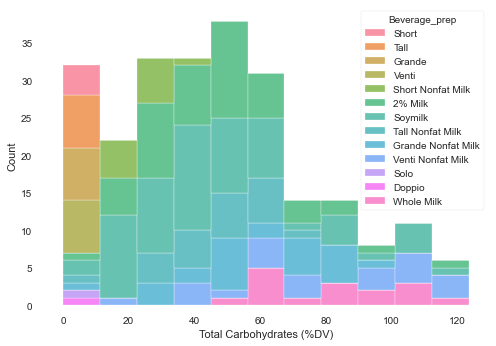

In [29]:
#change this for over 100 (for beverage category, type..)
#use color brewer scale...
sns.histplot(drinks_expanded, x='Total Carbohydrates (%DV)', hue='Beverage_prep', multiple="stack")

In [30]:
#use this to compare sugar, caffeine, and carbs
'''
sns.histplot(
    data=planets, x="distance", hue="method",
    hue_order=["Radial Velocity", "Transit"],
    log_scale=True, element="step", fill=False,
    cumulative=True, stat="density", common_norm=False,
)
'''

'\nsns.histplot(\n    data=planets, x="distance", hue="method",\n    hue_order=["Radial Velocity", "Transit"],\n    log_scale=True, element="step", fill=False,\n    cumulative=True, stat="density", common_norm=False,\n)\n'

<AxesSubplot:xlabel='Total Carbohydrates (%DV)', ylabel='Count'>

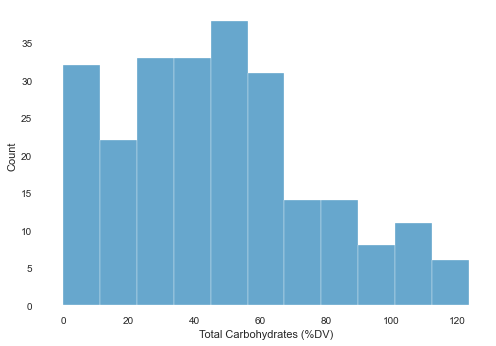

In [31]:
sns.histplot(drinks_expanded, x='Total Carbohydrates (%DV)')

<AxesSubplot:xlabel='Sugars (% DV)', ylabel='Count'>

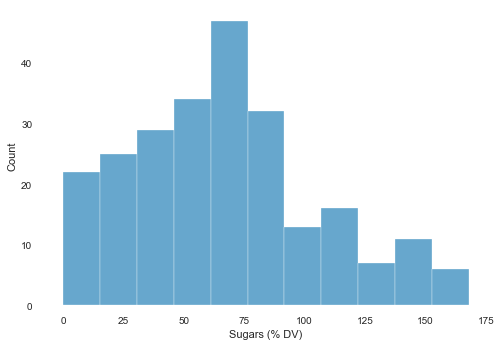

In [32]:
sns.histplot(drinks_expanded, x='Sugars (% DV)')

<AxesSubplot:xlabel='Caffeine (% Safe DV)', ylabel='Count'>

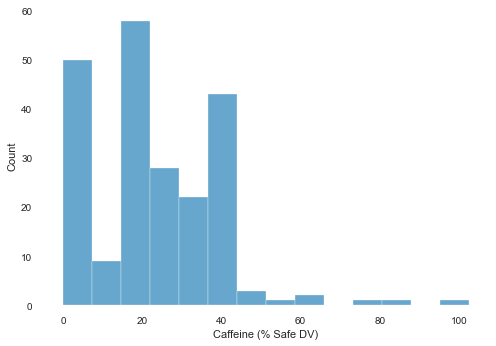

In [33]:
sns.histplot(drinks_expanded, x='Caffeine (% Safe DV)')

In [34]:
#create filters, use groupby to get more info on beverage category and prep
carbs_100plus = drinks_expanded[drinks_expanded['Total Carbohydrates (%DV)'] >= 100]
carbs_100plus.groupby(['Beverage_prep']).count()

,Beverage_category,Beverage,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),...,Calories(% DV),Total Fat (% DV),Saturated Fat (% DV),Sodium (% DV),Total Carbohydrates (%DV),Cholesterol (% DV),Dietary Fibre (% DV),Sugars (% DV),Protein (% DV),Caffeine (% Safe DV)
Beverage_prep,,,,,,,,,,,,,,,,,,,,,
2% Milk,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Soymilk,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
Venti Nonfat Milk,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
Whole Milk,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [44]:
#get drinks 100% + with carbs and sugars
#drinks_expanded[drinks_expanded['Total Carbohydrates (%DV)'] >= 100 & drinks_expanded['Sugars (% DV)'] >= 100]

TypeError: Cannot perform 'rand_' with a dtyped [float64] array and scalar of type [bool]

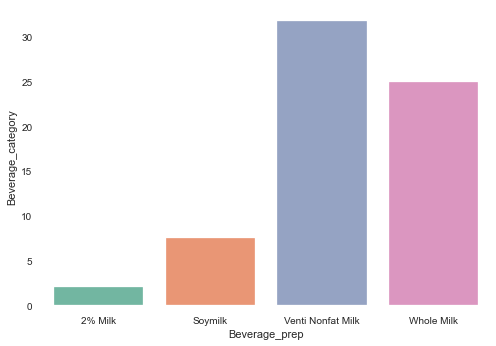

In [36]:
#plot the percent of each beverage_prep and beverage_category type that is present in the drinks with at or above 100% carbs
#plt.figure(figsize=(14,7))
carbs = ((carbs_100plus.groupby(['Beverage_prep']).count()/drinks_expanded.groupby(['Beverage_prep']).count())*100).dropna()
sns.barplot(x=carbs.index, y='Beverage_category', data=carbs, palette='Set2')
plt.show()

In [53]:
sugars_100plus = drinks_expanded[drinks_expanded['Sugars (% DV)'] >= 100]
sugars_100plus

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),...,Calories(% DV),Total Fat (% DV),Saturated Fat (% DV),Sodium (% DV),Total Carbohydrates (%DV),Cholesterol (% DV),Dietary Fibre (% DV),Sugars (% DV),Protein (% DV),Caffeine (% Safe DV)
82,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),Soymilk,370,10.0,5.0,0.0,0,220,56,...,18.5,12.820513,0.0,0.000000,80.000000,18.666667,3.571429,102.0,26.0,37.50
85,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),Soymilk,460,13.0,6.0,0.0,5,290,70,...,23.0,16.666667,0.0,0.217391,105.454545,23.333333,3.571429,128.0,32.0,37.50
129,Tazo® Tea Drinks,Tazo® Green Tea Latte,Soymilk,390,8.0,1.0,0.0,0,180,64,...,19.5,10.256410,0.0,0.000000,65.454545,21.333333,14.285714,116.0,28.0,27.50
189,Frappuccino® Blended Coffee,Coffee,Soymilk,310,2.5,0.3,0.0,0,300,68,...,15.5,3.205128,0.0,0.000000,109.090909,22.666667,3.571429,132.0,10.0,32.50
195,Frappuccino® Blended Coffee,Mocha (Without Whipped Cream),Soymilk,260,2.5,0.5,0.0,0,220,59,...,13.0,3.205128,0.0,0.000000,80.000000,19.666667,3.571429,110.0,8.0,27.50
198,Frappuccino® Blended Coffee,Mocha (Without Whipped Cream),Soymilk,350,3.0,1.0,0.0,0,290,78,...,17.5,3.846154,0.0,0.000000,105.454545,26.000000,7.142857,146.0,12.0,35.00
204,Frappuccino® Blended Coffee,Caramel (Without Whipped Cream),Soymilk,260,1.5,0.2,0.0,0,220,58,...,13.0,1.923077,0.0,0.000000,80.000000,19.333333,0.000000,112.0,6.0,25.00
207,Frappuccino® Blended Coffee,Caramel (Without Whipped Cream),Soymilk,340,2.5,0.3,0.0,0,290,75,...,17.0,3.205128,0.0,0.000000,105.454545,25.000000,3.571429,146.0,10.0,32.50
213,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Soymilk,310,6.0,3.5,0.0,0,240,65,...,15.5,7.692308,0.0,0.000000,87.272727,21.666667,7.142857,120.0,8.0,27.50
216,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Soymilk,430,8.0,4.5,0.0,0,330,88,...,21.5,10.256410,0.0,0.000000,120.000000,29.333333,10.714286,160.0,12.0,36.25


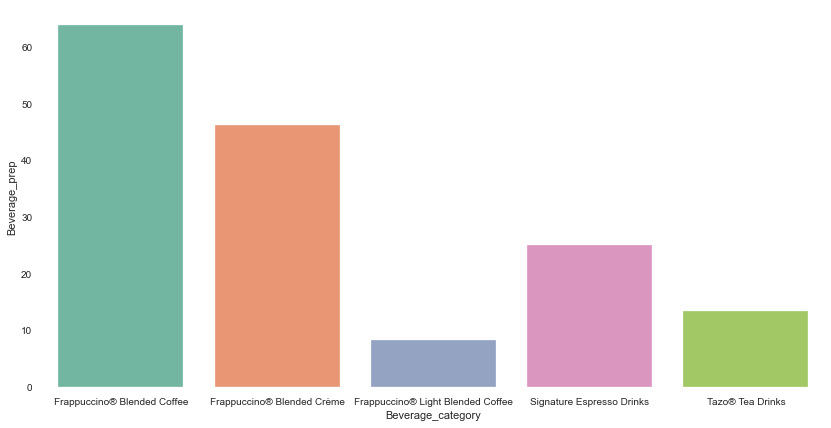

In [38]:
#plot the percent of each beverage_prep and category type that is present in the drinks with at or above 100% sugars
plt.figure(figsize=(14,7))
sugars = ((sugars_100plus.groupby(['Beverage_category']).count()/drinks_expanded.groupby(['Beverage_category']).count())*100).dropna()
sns.barplot(x=sugars.index, y='Beverage_prep', data=sugars, palette='Set2')
plt.show()

In [39]:
caffeine_100plus = drinks_expanded[drinks_expanded['Caffeine (% Safe DV)'] >= 50]
caffeine_100plus

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),...,Calories(% DV),Total Fat (% DV),Saturated Fat (% DV),Sodium (% DV),Total Carbohydrates (%DV),Cholesterol (% DV),Dietary Fibre (% DV),Sugars (% DV),Protein (% DV),Caffeine (% Safe DV)
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,...,0.20,0.128205,0.0,0.0,3.636364,0.000000,0.0,0.0,1.0,65.00
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,...,0.25,0.128205,0.0,0.0,3.636364,0.000000,0.0,0.0,2.0,82.50
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,...,0.25,0.128205,0.0,0.0,3.636364,0.000000,0.0,0.0,2.0,102.50
42,Classic Espresso Drinks,Caffè Americano,Grande,15,0.0,0.0,0.0,0,15,3,...,0.75,0.000000,0.0,0.0,5.454545,1.000000,0.0,0.0,2.0,56.25
43,Classic Espresso Drinks,Caffè Americano,Venti,25,0.0,0.0,0.0,0,15,4,...,1.25,0.000000,0.0,0.0,5.454545,1.333333,0.0,0.0,2.0,75.00
156,Shaken Iced Beverages,Iced Brewed Coffee (With Classic Syrup),Venti,130,0.1,0.0,0.0,0,5,31,...,6.50,0.128205,0.0,0.0,1.818182,10.333333,0.0,62.0,0.8,58.75


In [40]:
#check how many total drinks of that type are there (to compute ratios)
len(drinks_expanded[drinks_expanded.Beverage_prep == 'Venti'])

7

<AxesSubplot:xlabel='Total Carbohydrates (%DV)', ylabel='Sugars (% DV)'>

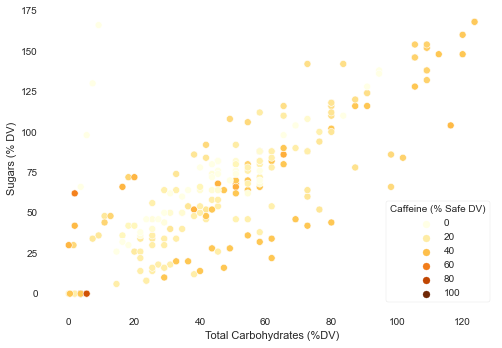

In [41]:
sns.scatterplot(data=drinks_expanded, x='Total Carbohydrates (%DV)' , y='Sugars (% DV)', hue='Caffeine (% Safe DV)', palette='YlOrBr')

In [42]:
#look at beverage prep/category value counts
drinks_expanded['Beverage_category'].value_counts()

Classic Espresso Drinks              58
Tazo® Tea Drinks                     52
Signature Espresso Drinks            40
Frappuccino® Blended Coffee          36
Shaken Iced Beverages                18
Frappuccino® Blended Crème           13
Frappuccino® Light Blended Coffee    12
Smoothies                             9
Coffee                                4
Name: Beverage_category, dtype: int64

In [43]:
#profile = ProfileReport(drinks_expanded)
#profile

## Give a 15 mins presentation to your mentor during your next call 
(NOTES for Powerpoint here)

https://docs.google.com/presentation/d/1qDKyDJBb3rAdNWPcTw2s2FJCINfLpMMfOhOmiiiGPXk/edit#slide=id.g9f24b80b97_0_148